In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("GlobalLandTemperaturesByCity.csv.zip")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


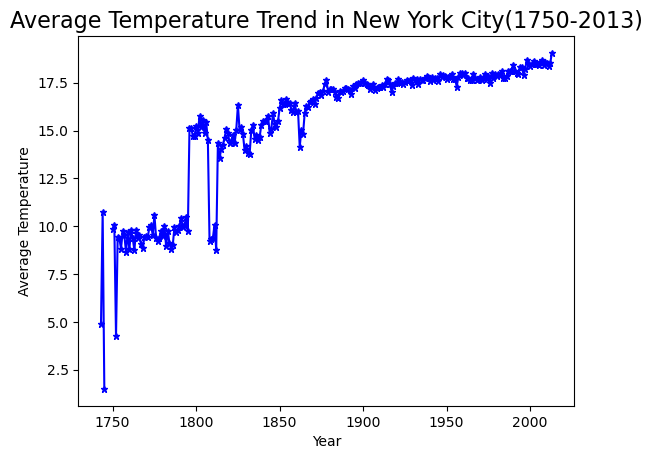

In [4]:
df['dt']=pd.to_datetime(df['dt'],format='%Y-%m-%d')
df['Year']=df['dt'].dt.year
annual_avg_temp=df.groupby('Year')['AverageTemperature'].mean()
plt.plot(annual_avg_temp.index,annual_avg_temp.values,color='blue',markersize=5,linestyle='-',marker='*')
plt.title('Average Temperature Trend in New York City(1750-2013)',fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()

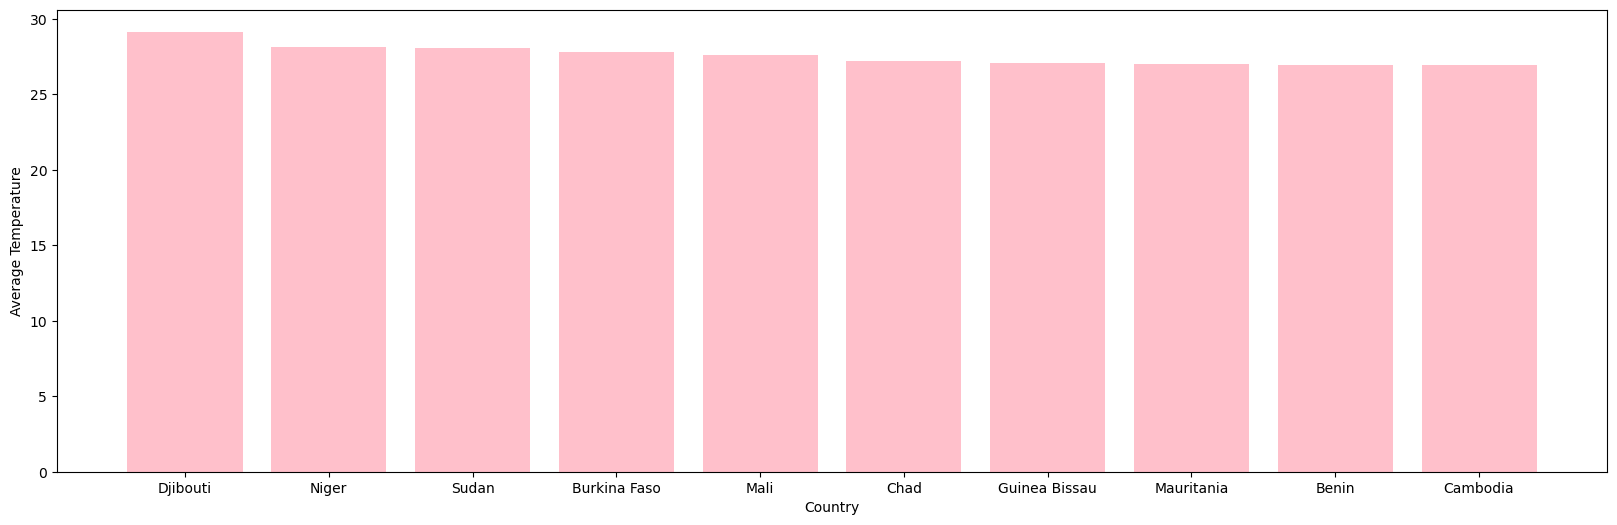

In [24]:

country_avg_temp = df.groupby('Country')['AverageTemperature'].mean()
country_avg_temp=country_avg_temp.dropna()
top_countries=country_avg_temp.sort_values(ascending=False).head(10)
plt.figure(figsize=(20, 6))
plt.bar(top_countries.index, top_countries.values, color='pink')
plt.xlabel('Country')
plt.ylabel('Average Temperature')
plt.show()


In [13]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude', 'Year'],
      dtype='object')

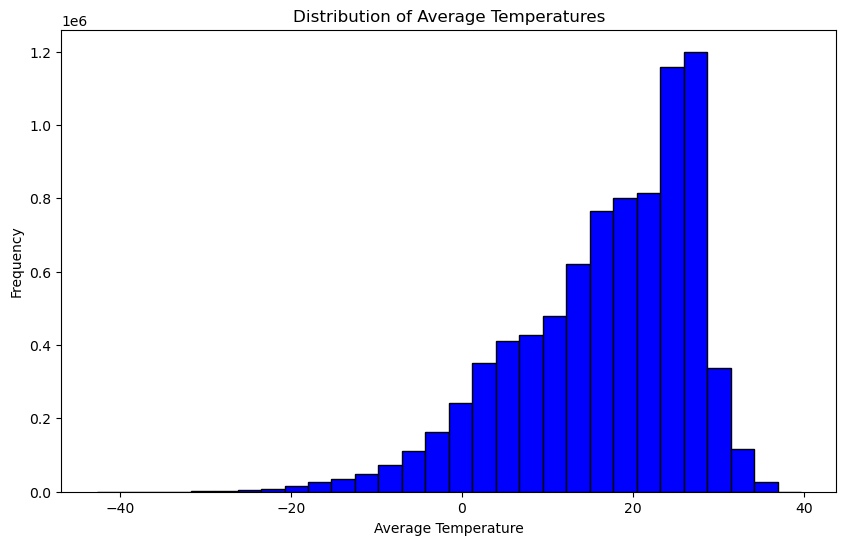

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['AverageTemperature'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Average Temperatures')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()


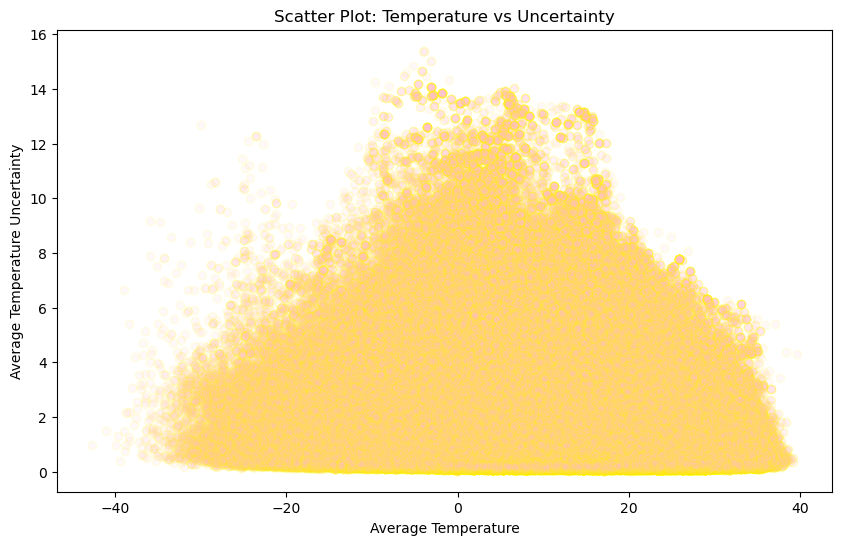

In [41]:
#is there a correlation between temperature and uncertainity in dataset scatter plot?
plt.figure(figsize=(10, 6))
plt.scatter(df['AverageTemperature'].dropna(),df['AverageTemperatureUncertainty'].dropna(), color='pink', alpha=0.1,edgecolor='yellow')
plt.title('Scatter Plot: Temperature vs Uncertainty')
plt.xlabel('Average Temperature')
plt.ylabel('Average Temperature Uncertainty')
plt.show()
#A scatter plot shows individual data ponts and reveals patterns like positive/negative correlation or clustering

In [66]:
#What is the spread of the temperature for a specific country over a given period
a=df[(df['Country']=='Denmark') & (df['Year'] >= 1743) & (df['Year'] <= 1760)]
a

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1743
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8596174,1760-08-01,16.147,9.138,Zwolle,Denmark,52.24N,5.26E,1760
8596175,1760-09-01,15.032,6.465,Zwolle,Denmark,52.24N,5.26E,1760
8596176,1760-10-01,9.472,5.719,Zwolle,Denmark,52.24N,5.26E,1760
8596177,1760-11-01,5.775,3.937,Zwolle,Denmark,52.24N,5.26E,1760


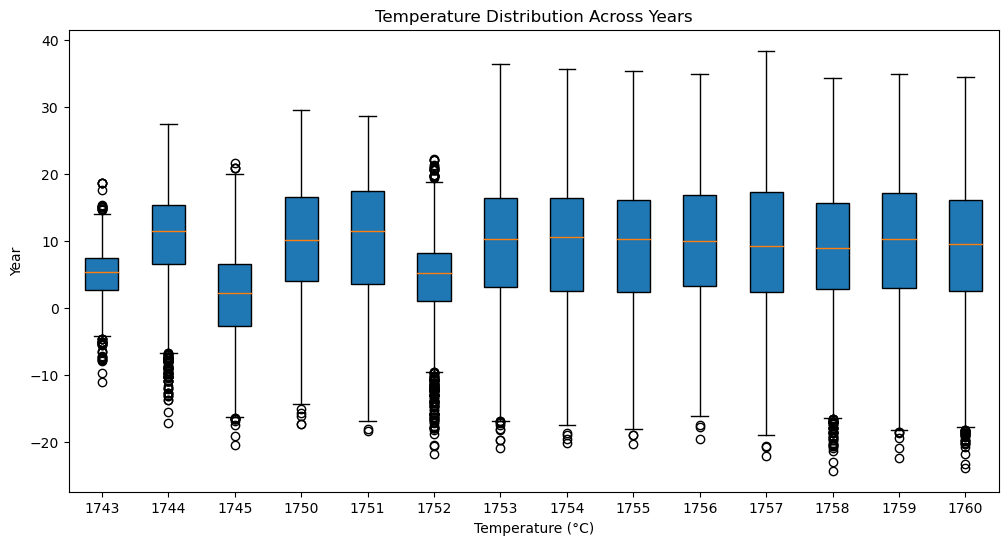

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
a = a.dropna(subset=['AverageTemperature', 'Year'])
plt.figure(figsize=(12, 6))
plt.boxplot([a[a['Year'] == year]['AverageTemperature'] for year in a['Year'].unique()], patch_artist=True, labels=a['Year'].unique())
plt.title("Temperature Distribution Across Years")
plt.xlabel("Temperature (°C)")
plt.ylabel("Year")
plt.show()


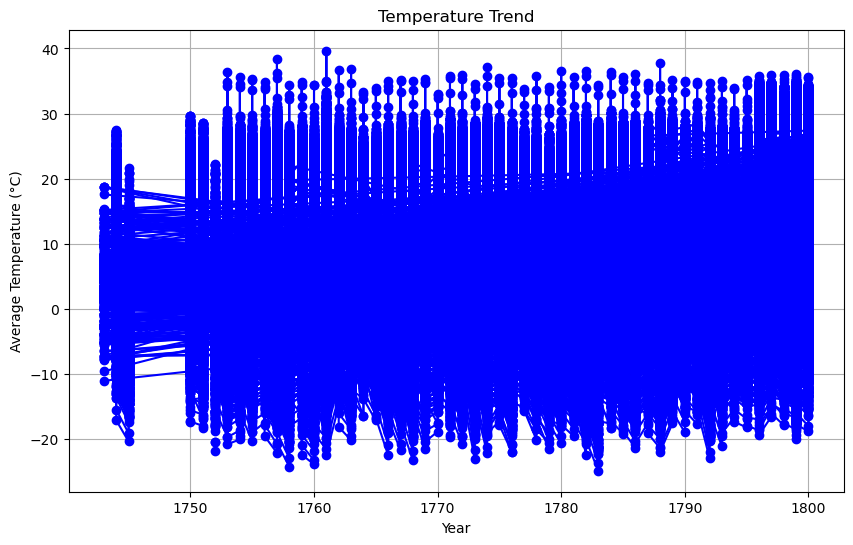

In [60]:
import matplotlib.pyplot as plt

# Increase the chunk size to handle larger datasets
plt.rcParams['agg.path.chunksize'] = 10000  # Adjust this number if necessary

# Your plotting code here
plt.figure(figsize=(10, 6))
plt.plot(a['Year'], a['AverageTemperature'], marker='o', linestyle='-', color='b')
plt.title("Temperature Trend")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()

# Introducing Seaborn

In [69]:
pip install seaborn

In [72]:
import seaborn as sns
import pandas as pd

In [73]:
tips=sns.load_dataset('tips')#built in data set
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [75]:
#suitable plots for categorical data:box-plot,bar-plot
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

# Histogram in seaborn

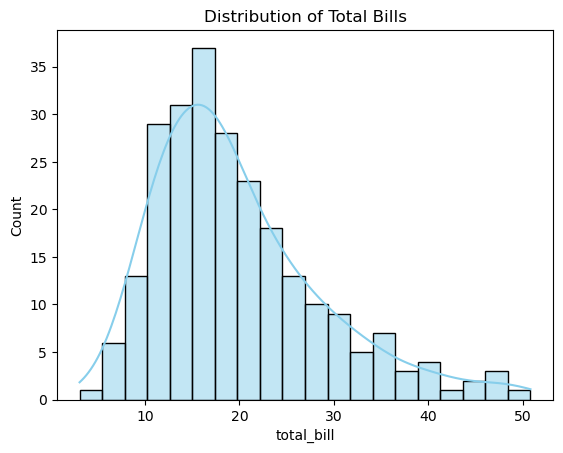

In [79]:
sns.histplot(data=tips,x="total_bill",kde=True,bins=20,color="skyblue")#kde is used to display the curve as in the smooth distribution data
plt.title("Distribution of Total Bills")
plt.show()

# KDE Plot

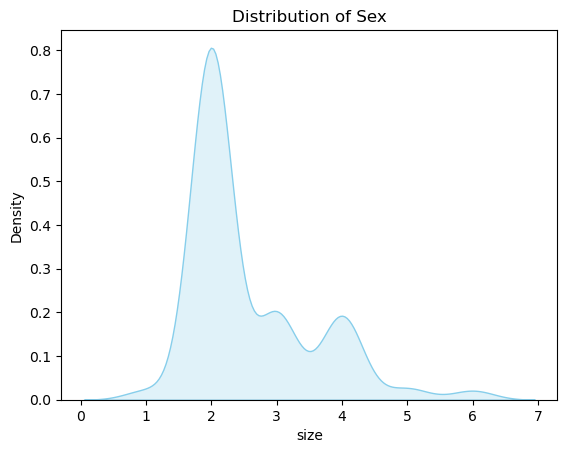

In [83]:
sns.kdeplot(data=tips,x="size",fill=True,color="skyblue")#fill/shade will color the region below the kdeplot
plt.title("Distribution of Sex")
plt.show()

# Bar Plot

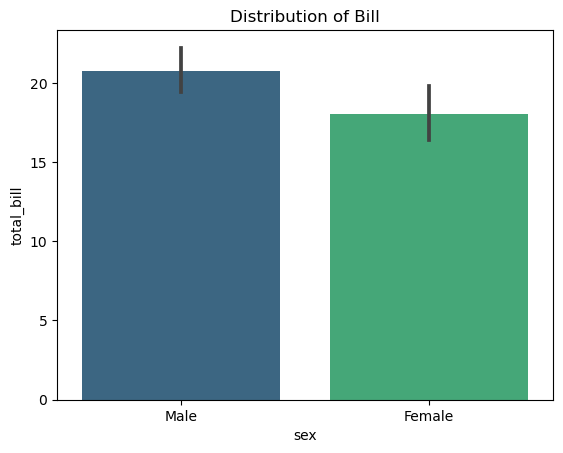

In [95]:
sns.barplot(data=tips,x="sex",y="total_bill",color="skyblue",palette="viridis")#palette gives a color pallete chosen all acros the bins
plt.title("Distribution of Bill")
plt.show()

# Box Plot👍

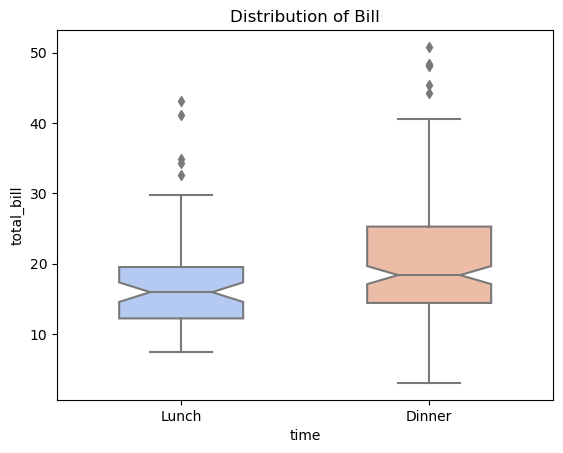

In [99]:
sns.boxplot(data=tips,x="time",y="total_bill",color="pink",notch=True,width=0.5,palette='coolwarm')#notch gives a shape near the media just to be able to compare the medians across the bins
plt.title("Distribution of Bill")
plt.show()

# Scatter Plot

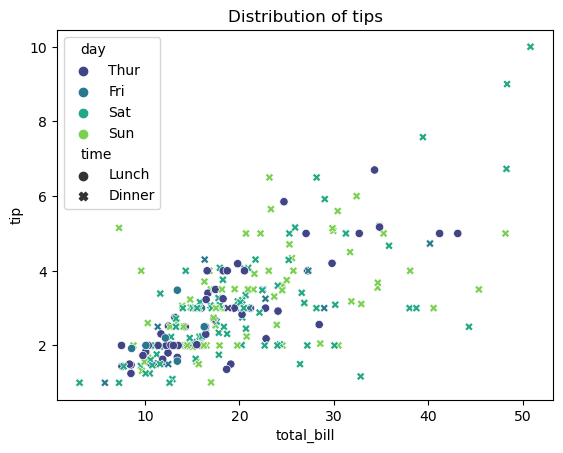

In [109]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="day",style="time",palette="viridis")#hue is used in categorical represetation to be able to differentiate diffrent days in this example with different symbols
plt.title("Distribution of tips")
plt.show()

# Line Plot

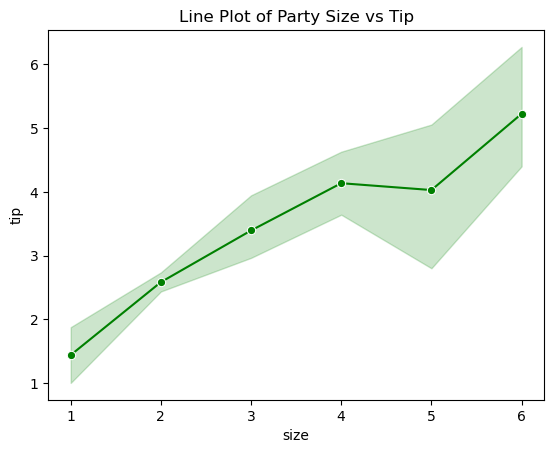

In [114]:
sns.lineplot(data=tips,x="size",y="tip",marker="o",color="green")#the shaded region is Confidence Interval(ci) which can be removed with ci=None
plt.title("Line Plot of Party Size vs Tip")
plt.show()

# Pair Plot

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


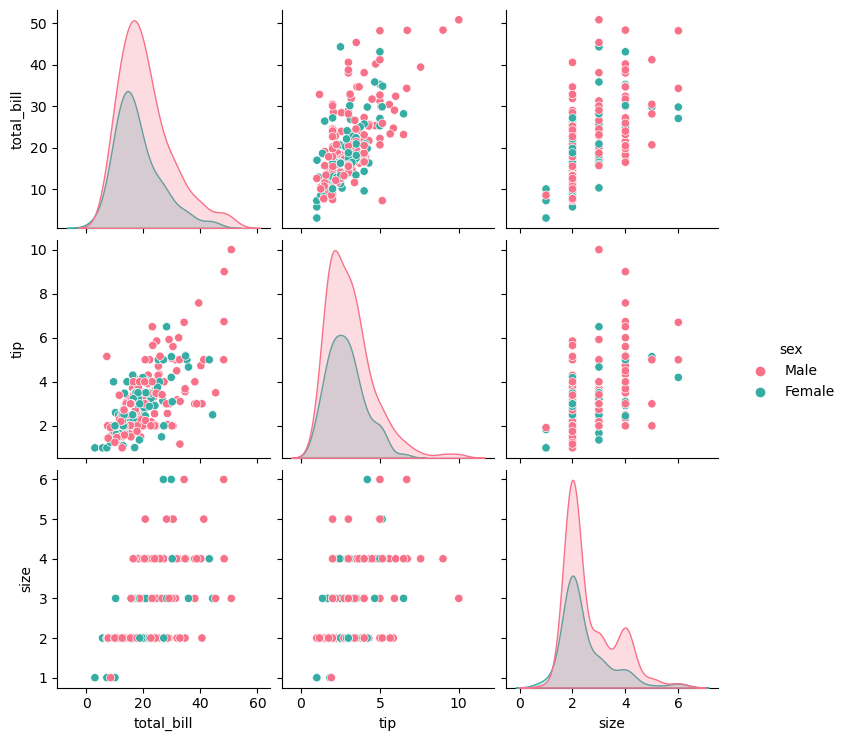

In [119]:
sns.pairplot(data=tips,hue="sex",palette="husl")
plt.show()

# Heat Map

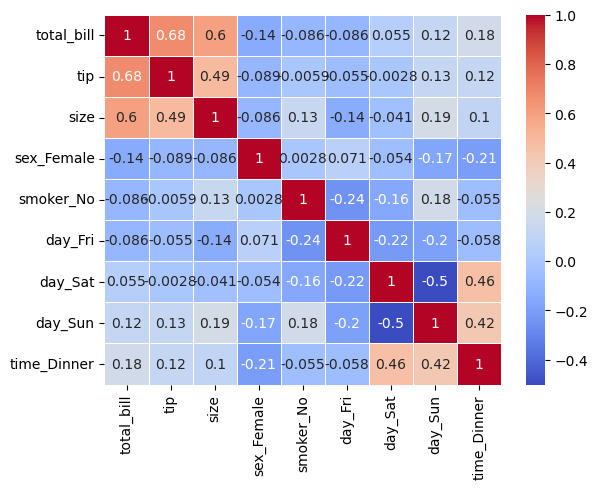

In [123]:
df=pd.DataFrame(tips)
dff=pd.get_dummies(df,drop_first=True)
cor = dff.corr()
sns.heatmap(data=cor, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()